In [1]:
import tensorflow as tf

In [2]:
import keras

Using TensorFlow backend.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [4]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Dataset Columns (Features)

Age (age in years)
Sex (1 = male; 0 = female)
CP (chest pain type)
TRESTBPS (resting blood pressure (in mm Hg on admission to the hospital))
CHOL (serum cholestoral in mg/dl)
FPS (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
RESTECH (resting electrocardiographic results)
THALACH (maximum heart rate achieved)
EXANG (exercise induced angina (1 = yes; 0 = no))
OLDPEAK (ST depression induced by exercise relative to rest)
SLOPE (the slope of the peak exercise ST segment)
CA (number of major vessels (0-3) colored by flourosopy)
THAL (3 = normal; 6 = fixed defect; 7 = reversable defect)
TARGET (1 or 0)


# Data Exploration

Concise summary of a Data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [9]:
#Dimensions of the data :
print('Number of rows in the dataset: ',df.shape[0])
print('Number of columns in the dataset: ',df.shape[1])

Number of rows in the dataset:  303
Number of columns in the dataset:  14


In [10]:
df.shape

(303, 14)

In [12]:
#Missing values detection :
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
#Descriptive statistics Generation.
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Checking how the target values depend on various features.

1. Sex

male: 207
female: 96


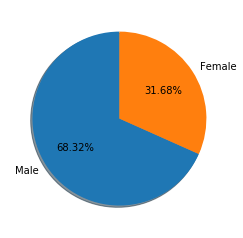

In [19]:
male = len(df[df.sex ==1])
female = len(df[df.sex == 0])
print ('male:',male)
print ('female:',female)
plt.pie(x=[male, female], explode=(0, 0), labels=['Male', 'Female'], autopct='%1.2f%%', shadow=True, startangle=90)
plt.show()

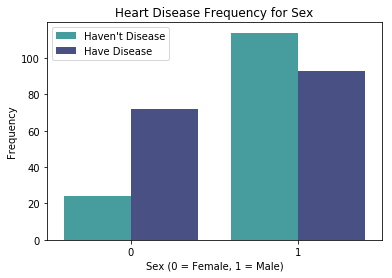

In [22]:
sn.countplot('sex',hue='target', data=df, palette='mako_r')
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

2. CP (chest pain type)

[143, 50, 87, 23]


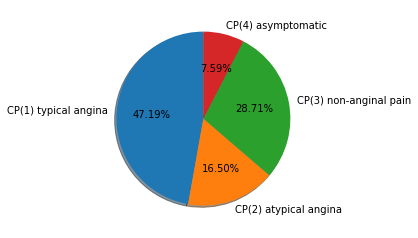

In [27]:
x = [len(df[df['cp'] == 0]),len(df[df['cp'] == 1]), len(df[df['cp'] == 2]), len(df[df['cp'] == 3])]
print (x)
plt.pie(x, data=df, labels=['CP(1) typical angina', 'CP(2) atypical angina', 'CP(3) non-anginal pain', 'CP(4) asymptomatic'], autopct='%1.2f%%', shadow=True,startangle=90)
plt.show()

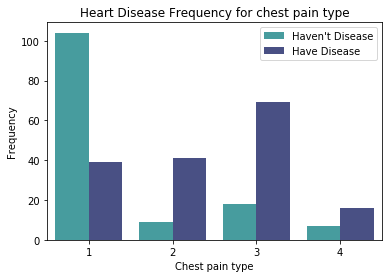

In [28]:
sn.countplot('cp',hue='target', data=df, palette='mako_r')
plt.title('Heart Disease Frequency for chest pain type')
plt.xlabel('Chest pain type')
plt.xticks(np.arange(4), [1, 2, 3, 4], rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

3. fbs (asting blood sugar)
(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

[258, 45]


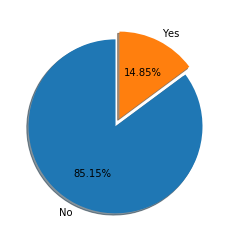

In [30]:
sizes = [len(df[df.fbs == 0]), len(df[df.fbs==1])]
print (sizes)
labels = ['No', 'Yes']
plt.pie(x=sizes, labels=labels, explode=(0.1, 0), autopct="%1.2f%%", startangle=90,shadow=True)
plt.show()

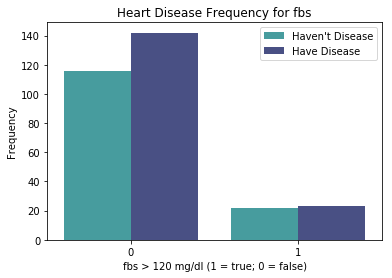

In [31]:
sn.countplot('fbs', hue='target', data=df, palette='mako_r')
plt.title('Heart Disease Frequency for fbs')
plt.xticks(rotation=0)
plt.xlabel('fbs > 120 mg/dl (1 = true; 0 = false)')
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

3.restecg (resting electrocardiographic results)

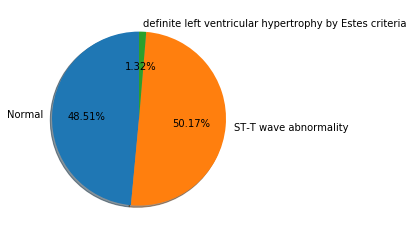

In [35]:
sizes = [len(df[df.restecg == 0]), len(df[df.restecg==1]), len(df[df.restecg==2])]
sizes
labels = ['Normal', 'ST-T wave abnormality', 'definite left ventricular hypertrophy by Estes criteria']
plt.pie(x=sizes, labels=labels, explode=(0, 0, 0), autopct="%1.2f%%", startangle=90,shadow=True)
plt.show()

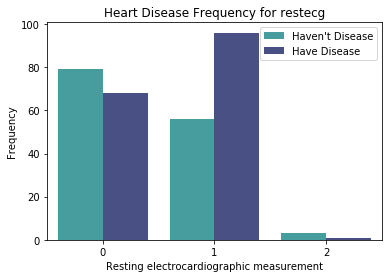

In [36]:
sn.countplot('restecg', hue='target', data=df, palette='mako_r')
plt.title('Heart Disease Frequency for restecg')
plt.xlabel('Resting electrocardiographic measurement')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

4. exang (exercise induced angina)

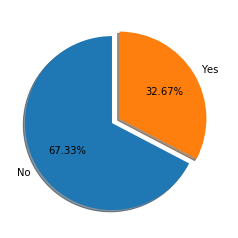

In [39]:
sizes = [len(df[df.exang == 0]), len(df[df.exang==1])]
sizes
labels = ['No', 'Yes']
plt.pie(x=sizes, labels=labels, explode=(0.1, 0), autopct="%1.2f%%", startangle=90,shadow=True)
plt.show()

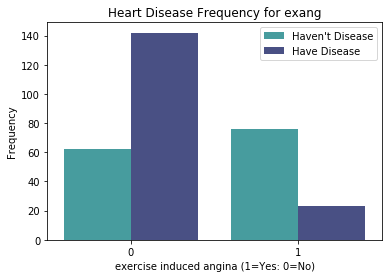

In [40]:
sn.countplot('exang', hue='target', data=df, palette='mako_r')
plt.title('Heart Disease Frequency for exang')
plt.xlabel('exercise induced angina (1=Yes: 0=No)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

5. Slope : The slope of the peak exercise ST segment

[21, 140, 142]


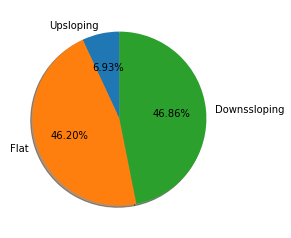

In [41]:
sizes = [len(df[df.slope == 0]), len(df[df.slope==1]), len(df[df.slope==2])]
print (sizes)
labels = ['Upsloping', 'Flat', 'Downssloping']
plt.pie(x=sizes, labels=labels, explode=(0, 0, 0), autopct="%1.2f%%", startangle=90,shadow=True)
plt.show()

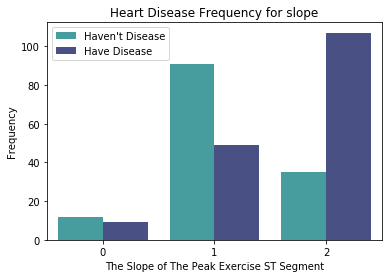

In [42]:
sn.countplot('slope', hue='target', data=df, palette='mako_r')
plt.title('Heart Disease Frequency for slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

6. thal : A blood disorder called thalassemia

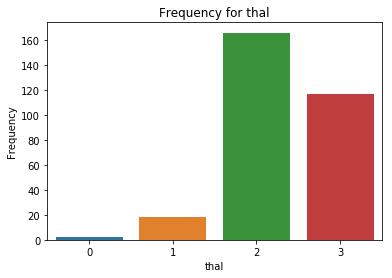

In [43]:
sn.countplot('thal', data=df)
plt.title('Frequency for thal')
plt.ylabel('Frequency')
plt.show()

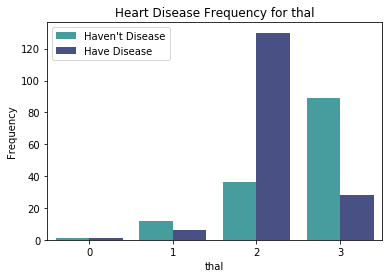

In [44]:
sn.countplot('thal', hue='target', data=df, palette='mako_r')
plt.title('Heart Disease Frequency for thal')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

7. Age

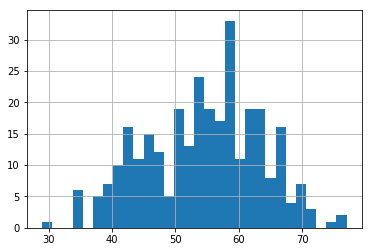

In [46]:
df.age.hist(bins=30)

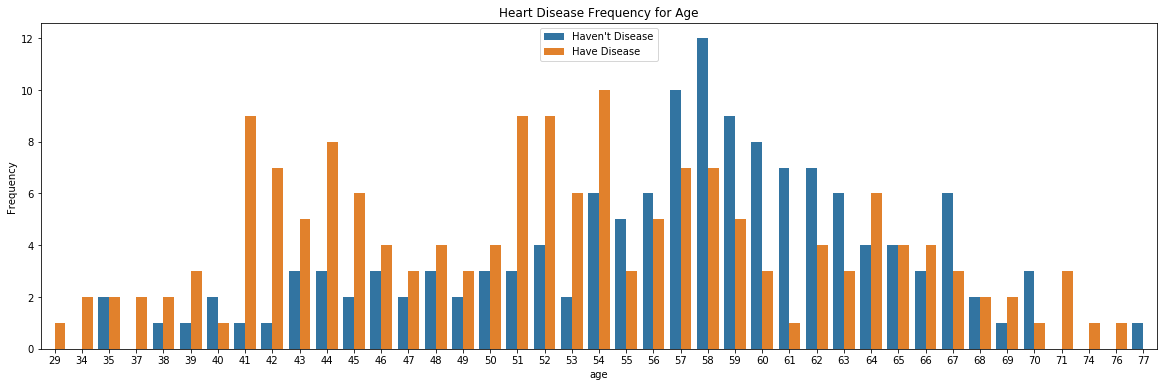

In [47]:
plt.figure(figsize=(20, 6))
sn.countplot('age', hue='target', data=df)
plt.title('Heart Disease Frequency for Age')
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

8. Chol : serum cholestoral in mg/dl


[]

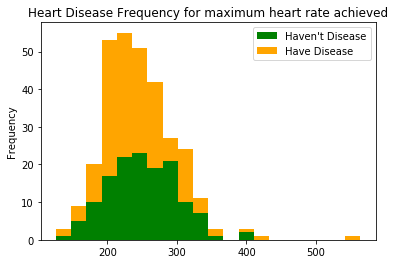

In [53]:
plt.hist([df.chol[df.target==0], df.chol[df.target==1]], bins=20,color=['green', 'orange'], stacked=True)
plt.legend(["Haven't Disease", "Have Disease"])
plt.title('Heart Disease Frequency for maximum heart rate achieved')
plt.ylabel('Frequency')
plt.plot()

9. thalach : maximum heart rate achieved

[]

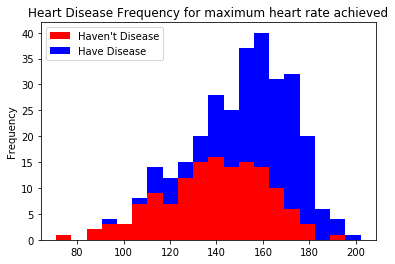

In [58]:
plt.hist([df.thalach[df.target==0], df.thalach[df.target==1]], bins=20,color=['red', 'blue'], stacked=True)
plt.legend(["Haven't Disease", "Have Disease"])
plt.title('Heart Disease Frequency for maximum heart rate achieved')
plt.ylabel('Frequency')
plt.plot()

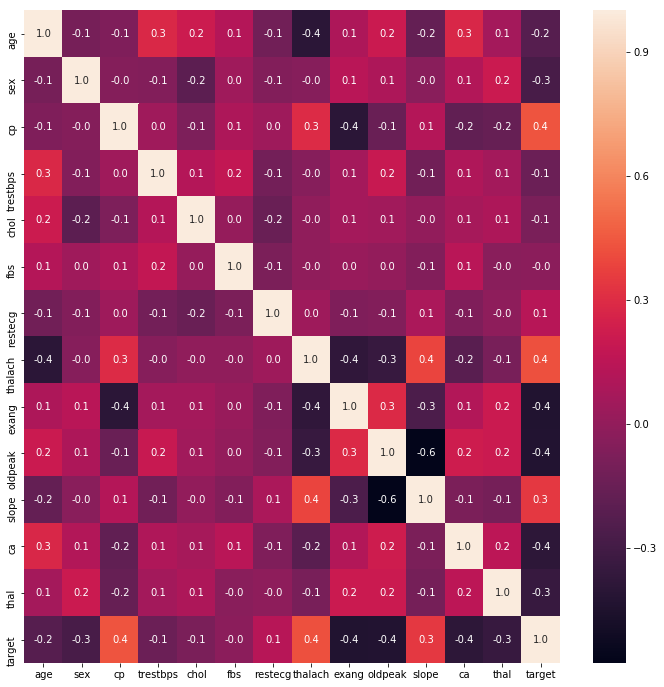

In [60]:
plt.figure(figsize=(12, 12))
sn.heatmap(df.corr(), annot=True, fmt='.1f')
plt.show()

# Data Preprocessing

Datasets contains Categorical Data so we have to create dummy variables.
'cp', 'thal' and 'slope' are categorical variables

In [63]:
cp = pd.get_dummies(df['cp'], prefix = "cp", drop_first=True)
thal = pd.get_dummies(df['thal'], prefix = "thal" , drop_first=True)
slope = pd.get_dummies(df['slope'], prefix = "slope", drop_first=True)

In [65]:
new_data = pd.concat([df, cp, thal, slope], axis=1)
new_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,thal,target,cp_1,cp_2,cp_3,thal_1,thal_2,thal_3,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,1,1,0,0,1,1,0,0,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,2,1,0,1,0,0,1,0,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,2,1,1,0,0,0,1,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,2,1,1,0,0,0,1,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,2,1,0,0,0,0,1,0,0,1


In [66]:
new_data.drop(['cp', 'thal', 'slope'], axis=1, inplace=True)
new_data.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,cp_1,cp_2,cp_3,thal_1,thal_2,thal_3,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,1,0,0,1,1,0,0,0,0
1,37,1,130,250,0,1,187,0,3.5,0,1,0,1,0,0,1,0,0,0
2,41,0,130,204,0,0,172,0,1.4,0,1,1,0,0,0,1,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,1,1,0,0,0,1,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,1,0,0,0,0,1,0,0,1


In [67]:
# removing target columns from dataset
X = new_data.drop(['target'], axis=1)
y = new_data.target

In [68]:
X.shapeX = (X - X.min())/(X.max()-X.min())
X.head()

(303, 18)

Nomalize the data

In [69]:
X = (X - X.min())/(X.max()-X.min())
X.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,cp_1,cp_2,cp_3,thal_1,thal_2,thal_3,slope_1,slope_2
0,0.708333,1.0,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.166667,1.0,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.250000,0.0,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.562500,1.0,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.583333,0.0,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


We will split our data. 80% of our data will be train data and 20% of it will be test data.

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Train model

In [71]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
# checking the score at test data
lr.score(X_test, y_test)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9016393442622951

[]

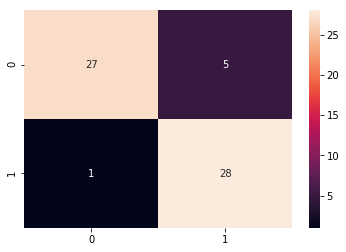

In [72]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, lr.predict(X_test))
sn.heatmap(cm, annot=True)
plt.plot()

In [73]:
from sklearn.model_selection import GridSearchCV


In [74]:
# Setting parameters for GridSearchCV
params = {'penalty':['l1','l2'],
         'C':[0.01,0.1,1,10,100],
         'class_weight':['balanced',None]}
lr_model = GridSearchCV(lr,param_grid=params,cv=10)

In [75]:
lr_model.fit(X_train,y_train)
lr_model.best_params_

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will 

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will 

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will 

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will 

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will 

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


{'C': 1, 'class_weight': 'balanced', 'penalty': 'l2'}

In [76]:
lr = LogisticRegression(C=1, penalty='l2')
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9016393442622951

In [77]:
from sklearn.ensemble import RandomForestClassifier
for i in range(1, 30):
    rfc = RandomForestClassifier(n_estimators=i)
    rfc.fit(X_train, y_train)
    print('estimators : ', i, "score : ", rfc.score(X_test, y_test), end="\n")

estimators :  1 score :  0.7704918032786885
estimators :  2 score :  0.8524590163934426
estimators :  3 score :  0.819672131147541
estimators :  4 score :  0.8852459016393442
estimators :  5 score :  0.7377049180327869
estimators :  6 score :  0.7704918032786885
estimators :  7 score :  0.8524590163934426
estimators :  8 score :  0.8852459016393442
estimators :  9 score :  0.8852459016393442
estimators :  10 score :  0.8360655737704918
estimators :  11 score :  0.9016393442622951
estimators :  12 score :  0.8688524590163934
estimators :  13 score :  0.9180327868852459
estimators :  14 score :  0.8688524590163934
estimators :  15 score :  0.9016393442622951
estimators :  16 score :  0.8524590163934426
estimators :  17 score :  0.819672131147541
estimators :  18 score :  0.8524590163934426
estimators :  19 score :  0.9016393442622951
estimators :  20 score :  0.9016393442622951
estimators :  21 score :  0.8032786885245902
estimators :  22 score :  0.8360655737704918
estimators :  23 scor

In [78]:
for i in range(1, 10):
    rfc = RandomForestClassifier(n_estimators=60, max_depth=i)
    rfc.fit(X_train, y_train)
    print('max_depth : ', i, "score : ", rfc.score(X_test, y_test), end="\n")

max_depth :  1 score :  0.9016393442622951
max_depth :  2 score :  0.8852459016393442
max_depth :  3 score :  0.9016393442622951
max_depth :  4 score :  0.8688524590163934
max_depth :  5 score :  0.9016393442622951
max_depth :  6 score :  0.9016393442622951
max_depth :  7 score :  0.9016393442622951
max_depth :  8 score :  0.819672131147541
max_depth :  9 score :  0.8852459016393442


In [79]:
rfc = RandomForestClassifier(n_estimators=30)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.8852459016393442

[]

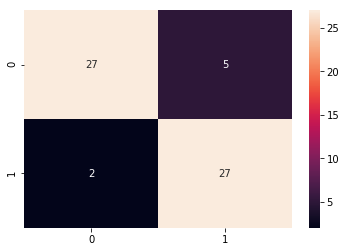

In [80]:
cm = confusion_matrix(y_test, rfc.predict(X_test))
sn.heatmap(cm, annot=True)
plt.plot()